In [160]:
import torch.nn.functional as F
import copy
import os
import torch
from torchinfo import summary
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
import sklearn.preprocessing
#from directory_tree import display_tree
# Customed Library
import engine ,model_builder,utils
import numpy as np
#import torchinfo
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
import random
import joblib
#display_tree('./')
import pickle
from datetime import datetime
from itertools import product

# 1 . load the function
### load_data
* input : pick
* output

### calibration_function
* input : pickle of data. 
* output : two figures(flag- digital signal,F/T, Pressure, TCP, sensors data)

### rawdataplot
* input : pickle of data. 
* output : two figures(flag- digital signal,F/T, Pressure, TCP, sensors data)

### rmse
* input
* output

### plot_prediction
* input
* output


### plot_loss_curves
* input
* output

# 1. Data load and calibration

## 1) Load the data and display the type of parameters

In [2]:
pickle_file_path = "./pickle/example/cir.pkl"

# Open and load the pickle file
with open(pickle_file_path, 'rb') as file:
    data = pickle.load(file)

column_names = data.columns.tolist()
data_param_type=column_names[38:]
data
TCP_col= pd.Index(['TCP_X','TCP_Y','TCP_Z'])
For_col = pd.Index(['Force_X','Force_Y','Force_Z'])
right_finger_pressure = pd.Index([ 'Sensor_P_1_1','Sensor_P_1_2',
                                      'Sensor_P_1_3','Sensor_P_1_4',
                                      'Sensor_P_1_5','Sensor_P_1_6',
                                      'Sensor_P_1_7','Sensor_P_1_8',
                                      'Sensor_P_1_9','Sensor_P_1_10',
                                      'Sensor_P_1_11','Sensor_P_1_12'])    
right_finger_strain = pd.Index([ 'Sensor_S_1' ])
right_finger_sensor=right_finger_pressure.append(right_finger_strain)
left_finger_pressure = pd.Index([ 'Sensor_P_2_1','Sensor_P_2_2',
                         'Sensor_P_2_3','Sensor_P_2_4',
                         'Sensor_P_2_5','Sensor_P_2_6',
                          'Sensor_P_2_7','Sensor_P_2_8',
                           'Sensor_P_2_9','Sensor_P_2_10',
                           'Sensor_P_2_11','Sensor_P_2_12'])

left_finger_strain = pd.Index([ 'Sensor_S_2' ])

left_finger_sensor=left_finger_pressure.append(left_finger_strain)


Cal_list_col=[For_col,TCP_col]
Sensor_Cal_list_col=[right_finger_sensor,left_finger_sensor]
Columns= data.columns.tolist()
data

,Flag,Force_X,Force_Y,Force_Z,Torque_X,Torque_Y,Torque_Z,Input_P_1,Input_P_2,TCP_X,...,Sensor_P_2_6,Sensor_P_2_7,Sensor_P_2_8,Sensor_P_2_9,Sensor_P_2_10,Sensor_P_2_11,Sensor_P_2_12,Sensor_S_2,shape,Properties
0,False,-0.180989,0.232486,0.210801,0.002712,0.002742,-0.000381,0.0,0.0,-0.033893,...,761.600037,743.599976,754.899963,963.900024,557.900024,531.300049,636.200012,282.0,cirr,2
1,False,-0.180989,0.232486,0.210801,0.002712,0.002742,-0.000381,0.0,0.0,-0.033893,...,761.600037,743.599976,754.899963,963.900024,557.900024,531.300049,636.200012,282.0,cirr,2
2,False,-0.180989,0.232486,0.210801,0.002712,0.002742,-0.000381,0.0,0.0,-0.033893,...,761.600037,743.599976,754.899963,963.900024,557.900024,531.300049,636.200012,282.0,cirr,2
3,False,-0.180989,0.232486,0.210801,0.002712,0.002742,-0.000381,0.0,0.0,-0.033893,...,761.600037,743.599976,754.899963,963.900024,557.900024,531.300049,636.200012,282.0,cirr,2
4,False,-0.180989,0.232486,0.210801,0.002712,0.002742,-0.000381,0.0,0.0,-0.033887,...,760.700012,751.700012,755.500000,964.999939,556.899963,534.900024,636.200012,279.0,cirr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123078,False,-0.152498,0.139361,0.174343,0.009256,0.003905,0.000613,0.0,0.0,-0.033558,...,730.799988,715.000000,726.400024,950.800049,525.899963,432.600037,348.700012,282.0,cirr,1
123079,False,-0.152498,0.139361,0.174343,0.009256,0.003905,0.000613,0.0,0.0,-0.033558,...,730.799988,715.000000,726.400024,950.800049,525.899963,432.600037,348.700012,282.0,cirr,1
123080,False,-0.152498,0.139361,0.174343,0.009256,0.003905,0.000613,0.0,0.0,-0.033558,...,730.799988,715.000000,726.400024,950.800049,525.899963,432.600037,348.700012,282.0,cirr,1
123081,False,-0.152498,0.139361,0.174343,0.009256,0.003905,0.000613,0.0,0.0,-0.033558,...,730.799988,715.000000,726.400024,950.800049,525.899963,432.600037,348.700012,282.0,cirr,1


In [51]:
Sensor_Cal_list_col

[Index(['Sensor_P_1_1', 'Sensor_P_1_2', 'Sensor_P_1_3', 'Sensor_P_1_4',
        'Sensor_P_1_5', 'Sensor_P_1_6', 'Sensor_P_1_7', 'Sensor_P_1_8',
        'Sensor_P_1_9', 'Sensor_P_1_10', 'Sensor_P_1_11', 'Sensor_P_1_12',
        'Sensor_S_1'],
       dtype='object'),
 Index(['Sensor_P_2_1', 'Sensor_P_2_2', 'Sensor_P_2_3', 'Sensor_P_2_4',
        'Sensor_P_2_5', 'Sensor_P_2_6', 'Sensor_P_2_7', 'Sensor_P_2_8',
        'Sensor_P_2_9', 'Sensor_P_2_10', 'Sensor_P_2_11', 'Sensor_P_2_12',
        'Sensor_S_2'],
       dtype='object')]

## 2) Calibrate the data and concatnate into the same length

In [78]:
def calibration_function(tar:pd.DataFrame,Cal_list_col:list,Sensor_Cal_list_col:list  ):
    tar=pd.DataFrame(tar.query('Flag==True ').values,columns=Columns)
    for i in range(len(Cal_list_col)):
        for j in range(len(Cal_list_col[i])):

            col_name=Cal_list_col[i][j]

            tar[col_name]=tar[col_name]-tar[col_name][0]

    # Sensor signal
    for i in range(len(Sensor_Cal_list_col)):
        for j in range(len(Sensor_Cal_list_col[i])):

            col_name=Sensor_Cal_list_col[i][j]

            tar[col_name]=tar[col_name]-tar[col_name][0] +0*j
    return tar



In [117]:
# Check the param type
list_data_param=[]
for i in range(len(data_param_type)):
    data_param_value_group=np.sort(data[data_param_type[i]].unique()).tolist()
    print(f'Parameter  :   {data_param_type[i]}   | Unique value   : {data_param_value_group}')
    list_data_param.append([data_param_type[i],data_param_value_group])
param_dict = {key: value for key, value in list_data_param}
print(f'Parameter dictionary {param_dict}')

from itertools import product
values=param_dict.values()
keys=s=param_dict.keys()

# Make list for listing up all combination of the param
calibration_combi=[]
for combination in product(*values):
    calibration_combi.append( dict(zip(keys, combination)))


random.shuffle(calibration_combi)

tr_te_ratio=0.7
index_tr=round(len(calibration_combi)*0.7)

tr_list = calibration_combi[0:index_tr]
te_list = calibration_combi[index_tr:]


Parameter  :   shape   | Unique value   : ['cirr']
Parameter  :   Properties   | Unique value   : ['1', '2', '3', '4']
Parameter dictionary {'shape': ['cirr'], 'Properties': ['1', '2', '3', '4']}


In [157]:
# Tr
query_list=[]
for i in range(len(tr_list)):
    k=list(tr_list[i].keys())
    v=list(tr_list[i].values())
    query=[]
    # making Query
    for j in range(len(k)):
        query.append(k[j]+'=="'+v[j]+'"')
    query_list.append(query)
    temp_data=data
    # Filtering Data
    for k in range(len(query)):
        temp_data=calibration_function(pd.DataFrame(temp_data.query( query[k]).values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
    print(query)
    if i ==0:
        Tr_Data=temp_data
    else:
        Tr_Data=pd.concat([Tr_Data,temp_data])

query_list=[]
for i in range(len(te_list)):
    k=list(te_list[i].keys())
    v=list(te_list[i].values())
    query=[]
    # making Query
    for j in range(len(k)):
        query.append(k[j]+'=="'+v[j]+'"')
    query_list.append(query)
    temp_data=data
    # Filtering Data
    for k in range(len(query)):
        temp_data=calibration_function(pd.DataFrame(temp_data.query( query[k]).values,columns=Columns),Cal_list_col,Sensor_Cal_list_col)
    print(query)
    if i ==0:
        Te_Data=temp_data
    else:
        Te_Data=pd.concat([Te_Data,temp_data])
    
        
                   
                   
        
        
    

['shape=="cirr"', 'Properties=="1"']
['shape=="cirr"', 'Properties=="3"']
['shape=="cirr"', 'Properties=="4"']


C:\Users\hoons\AppData\Local\Temp\ipykernel_8848\1526319621.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  Tr_Data=pd.concat([Tr_Data,temp_data])


['shape=="cirr"', 'Properties=="2"']


# 2 . Model defining

In [42]:
from torch import nn 
    
class GRUModel_V2(nn.Module):
    def __init__(self, input_dim : int, hidden_dim:int, layer_dim:int, output_dim:int, dropout_prob:float,device):
        super(GRUModel_V2, self).__init__()
        self.hidden_size = hidden_dim

        # Define the RNN layer
        self.rnn = nn.GRU(input_dim, hidden_dim,num_layers=layer_dim, batch_first=True,dropout=dropout_prob,device=device)
        
        self.act_F=nn.Tanh()
        # Define the fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None):
        # x: input tensor of shape (batch_size, sequence_length, input_size)
        # h0: initial hidden state (optional)

        # RNN layer
        out, hn = self.rnn(x, h0)
        
        out = self.act_F(out)
        # Select the last time step's output
        out = out[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out
    


# 4. Training
- training different conditions of the model
- tunable parameter : number of layer, sequential length, num_epochs, batchsize, model, hidden node, learning late, dropout_prob.
###save file  model


C:\Users\hoons\anaconda3\envs\ml_env\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.2504 | test_loss: 2.5981 | 
Time taken : 15.490280699999857
[INFO] Saving model to: results\May_16_1\models\gruLD_1SQ_1HU_1\model.pth


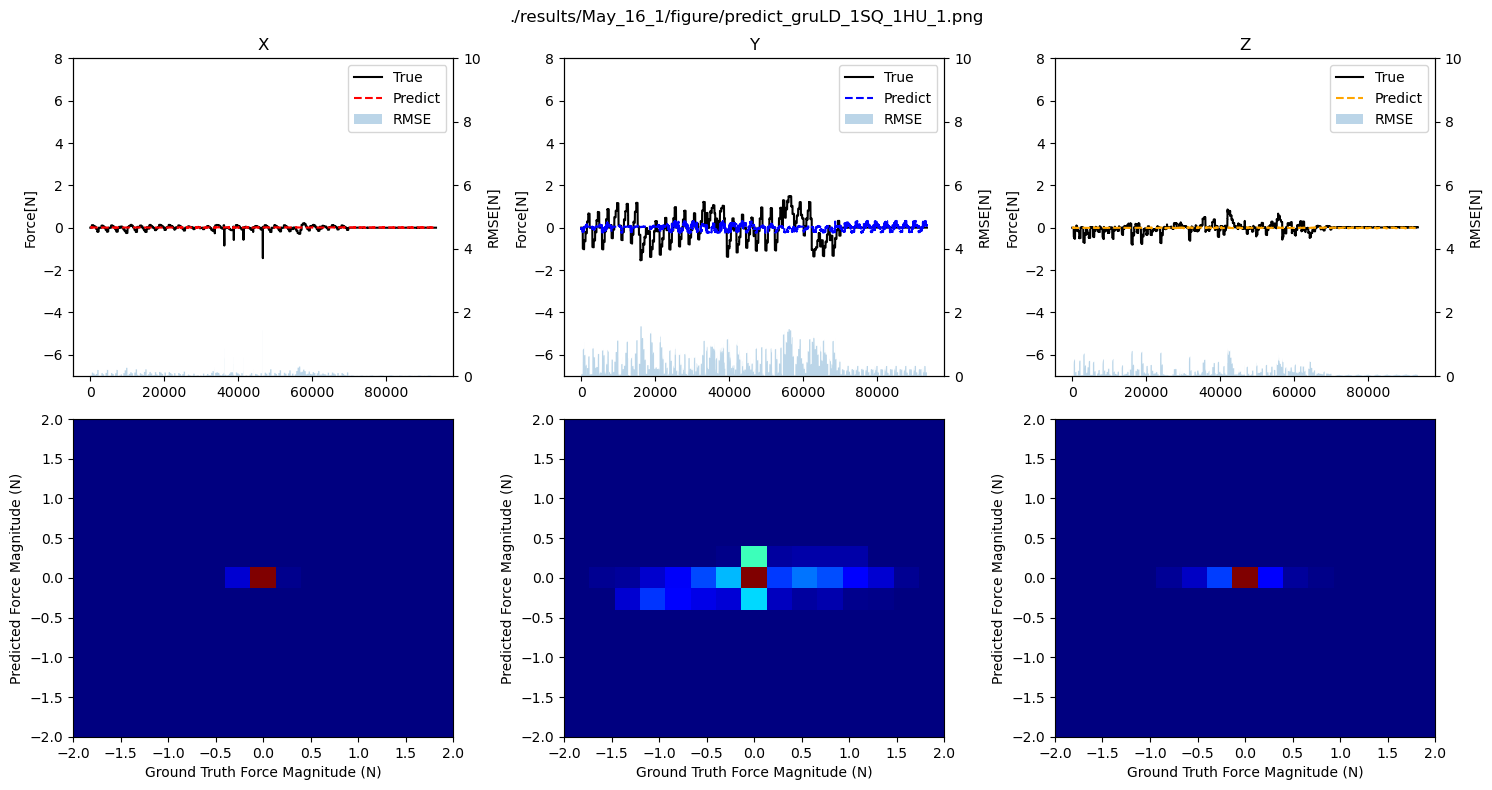

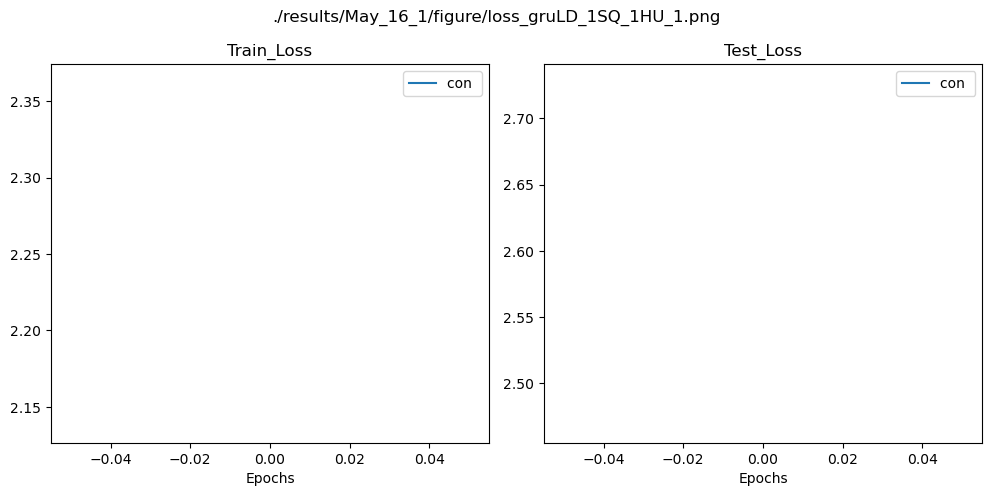

C:\Users\hoons\anaconda3\envs\ml_env\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.9498 | test_loss: 2.2285 | 
Time taken : 16.07862389999991
[INFO] Saving model to: results\May_16_1\models\gruLD_1SQ_1HU_2\model.pth


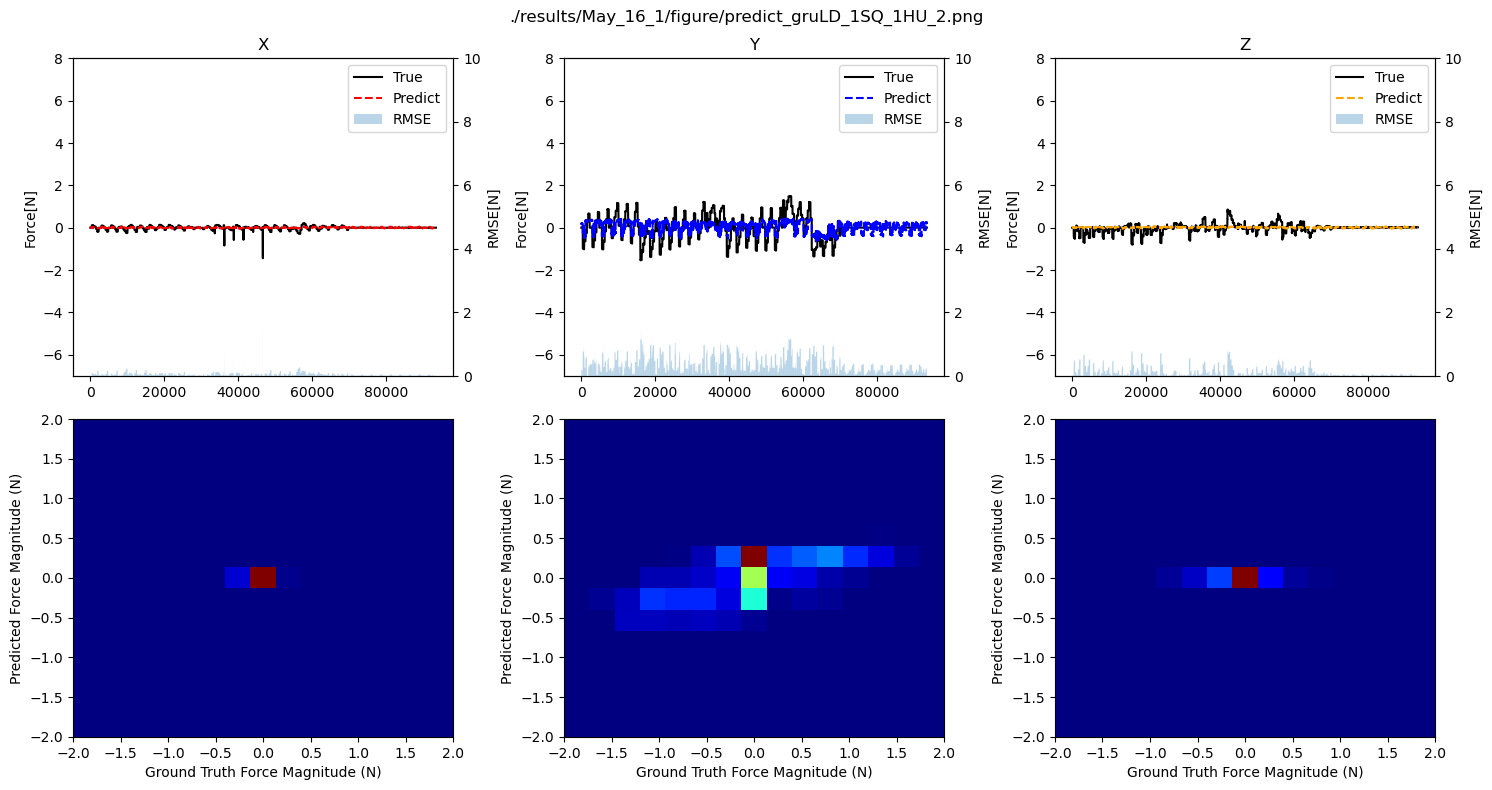

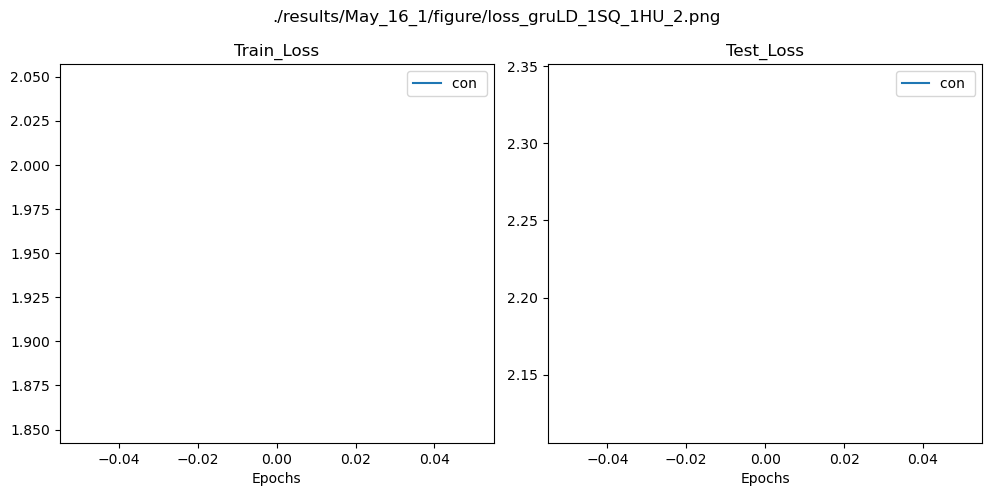

C:\Users\hoons\anaconda3\envs\ml_env\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.3218 | test_loss: 2.5858 | 
Time taken : 17.542988400000468
[INFO] Saving model to: results\May_16_1\models\gruLD_1SQ_2HU_1\model.pth


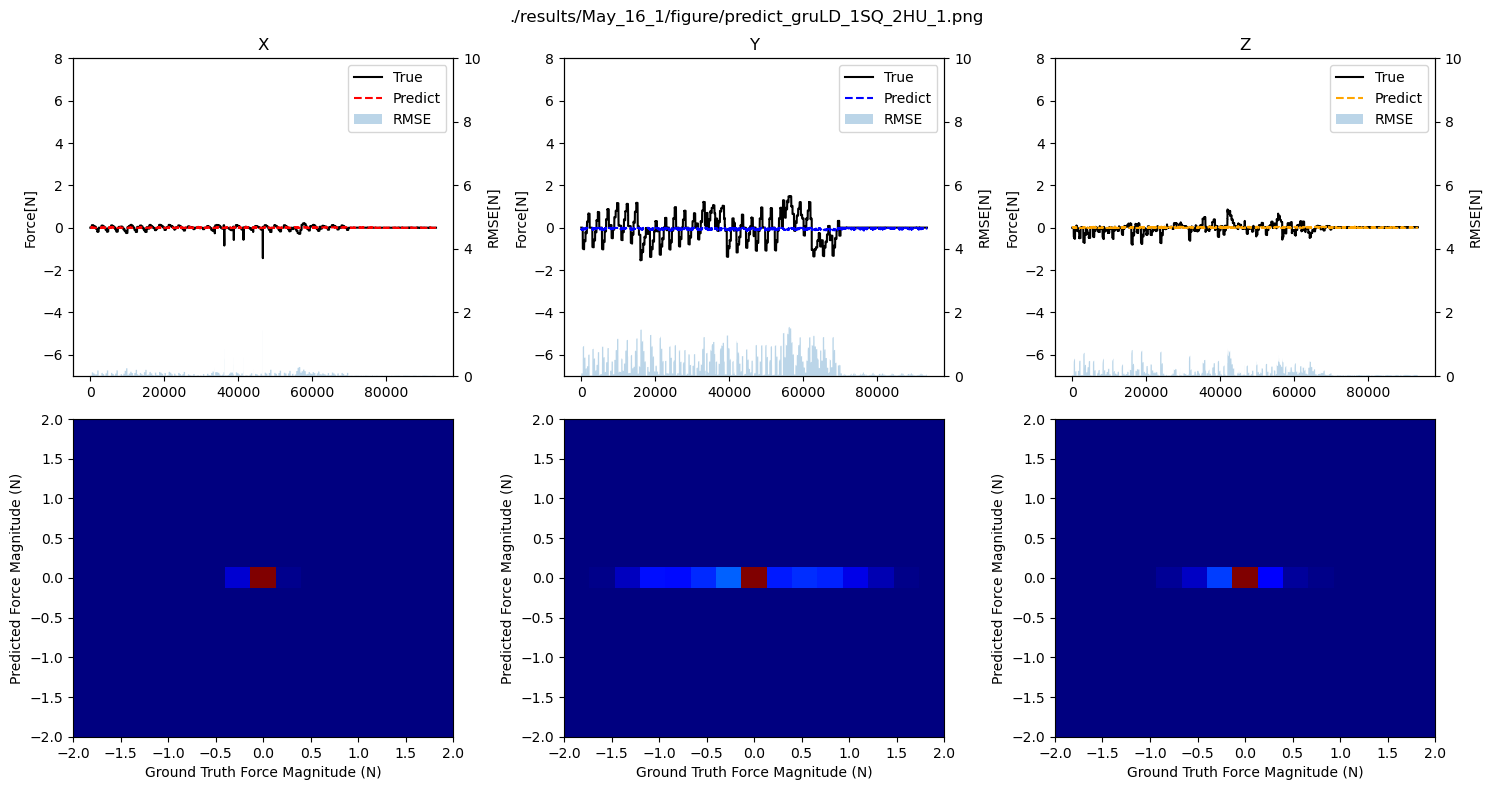

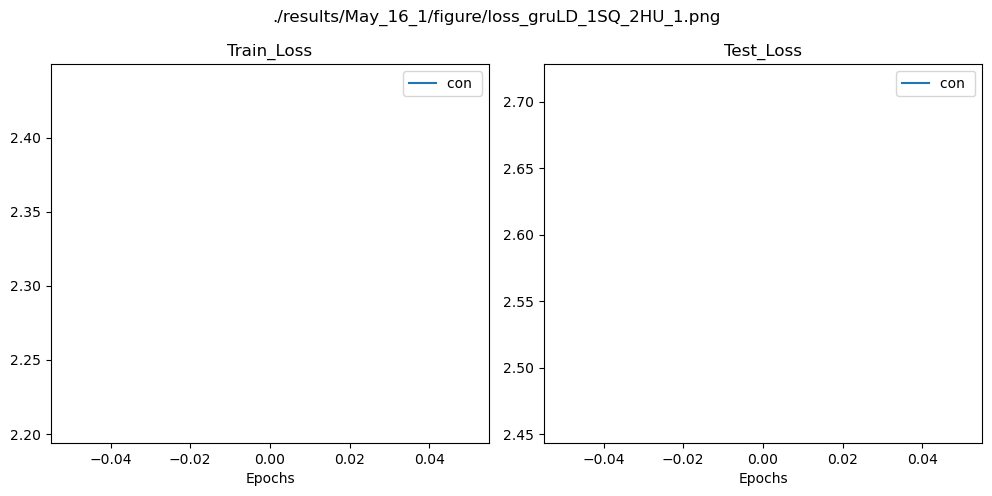

C:\Users\hoons\anaconda3\envs\ml_env\lib\site-packages\torch\nn\modules\rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.1149 | test_loss: 2.2792 | 
Time taken : 16.324629700000514
[INFO] Saving model to: results\May_16_1\models\gruLD_1SQ_2HU_2\model.pth


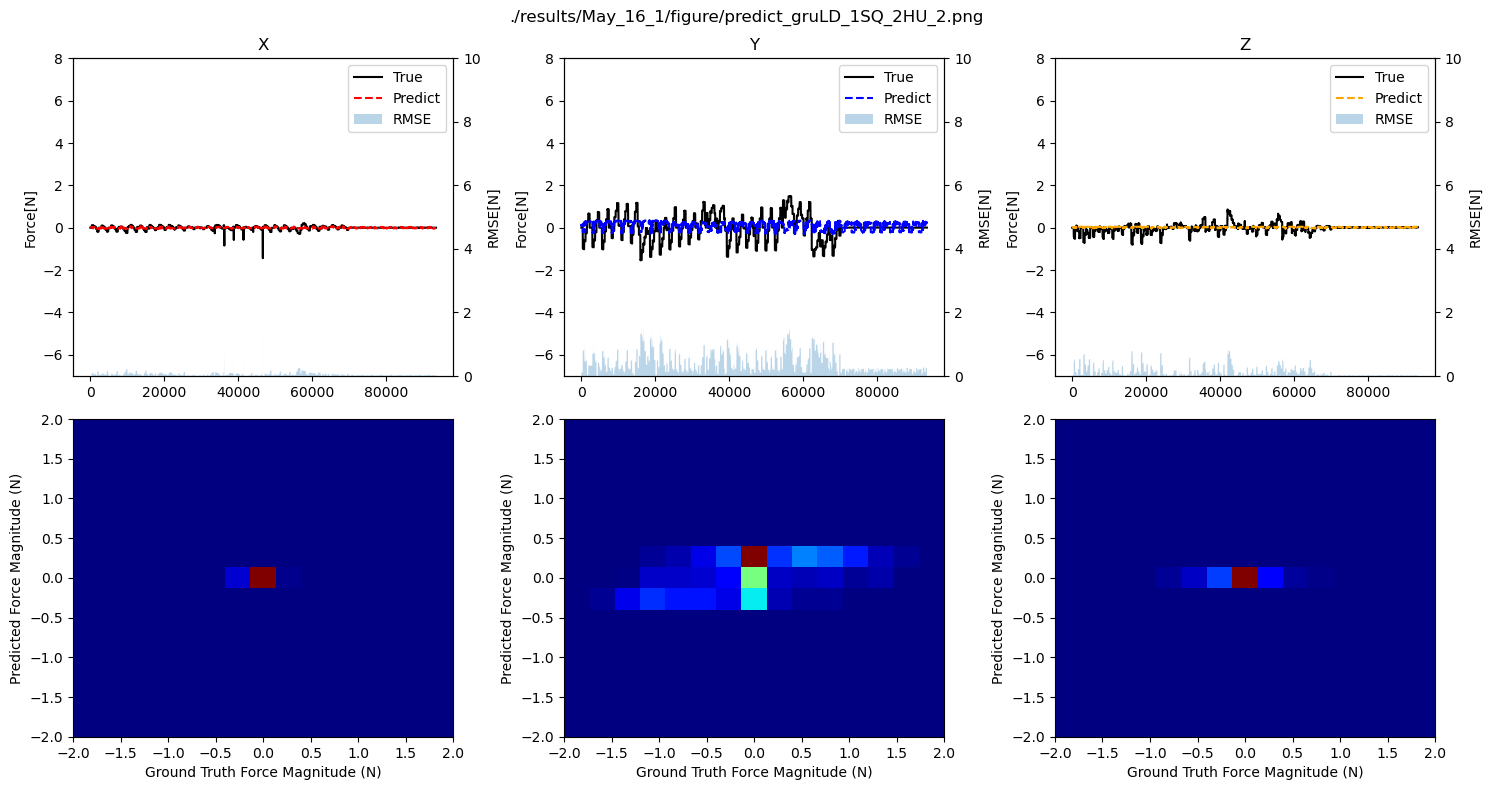

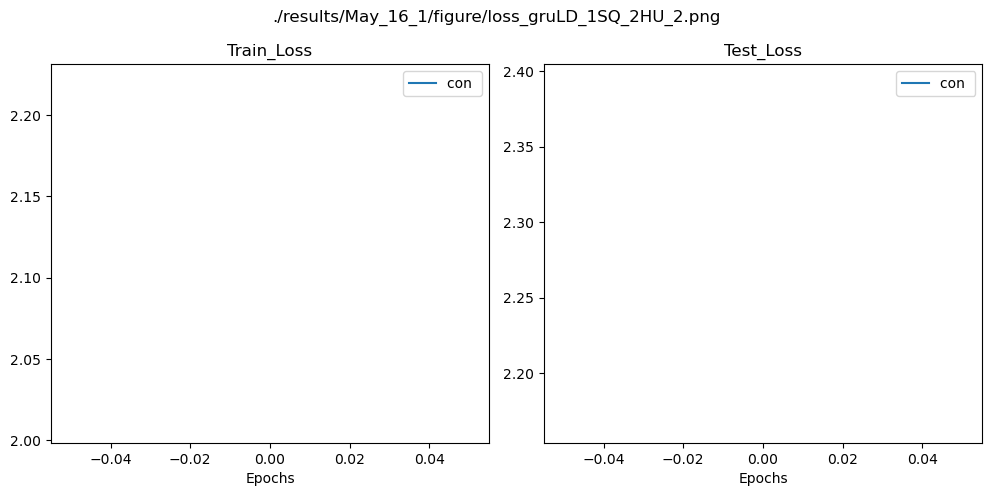

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.4862 | test_loss: 2.7261 | 
Time taken : 21.26288260000001
[INFO] Saving model to: results\May_16_1\models\gruLD_2SQ_1HU_1\model.pth


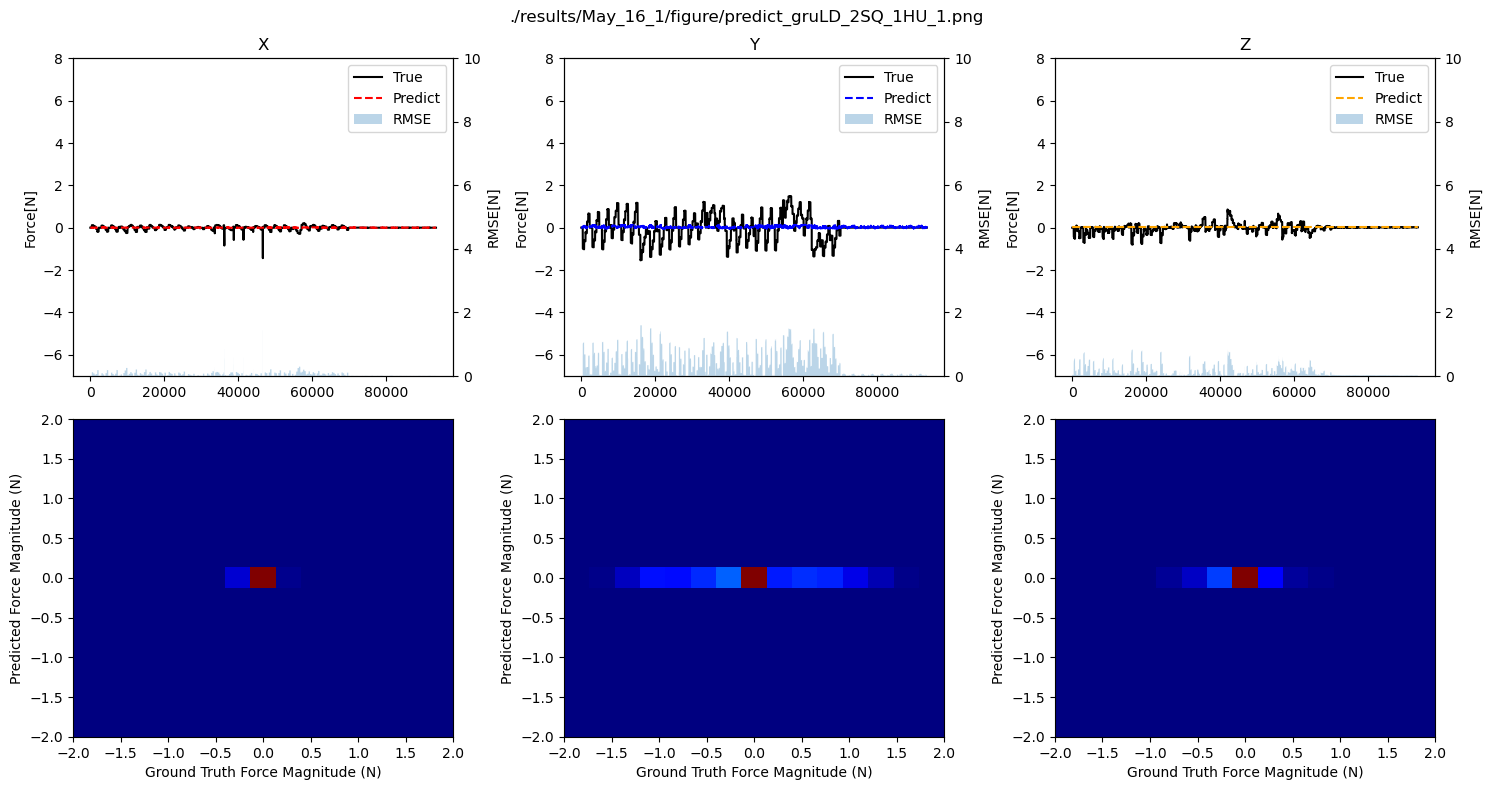

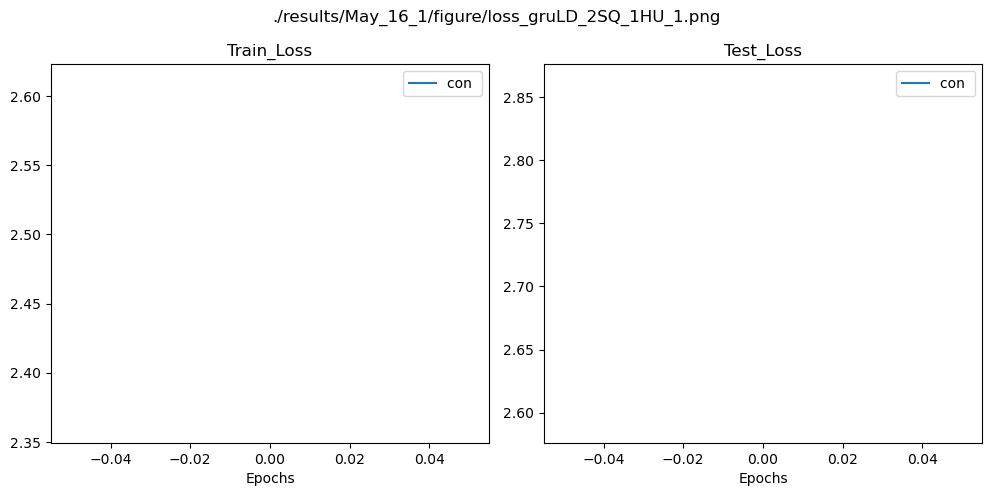

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.0708 | test_loss: 2.3756 | 
Time taken : 18.80703790000007
[INFO] Saving model to: results\May_16_1\models\gruLD_2SQ_1HU_2\model.pth


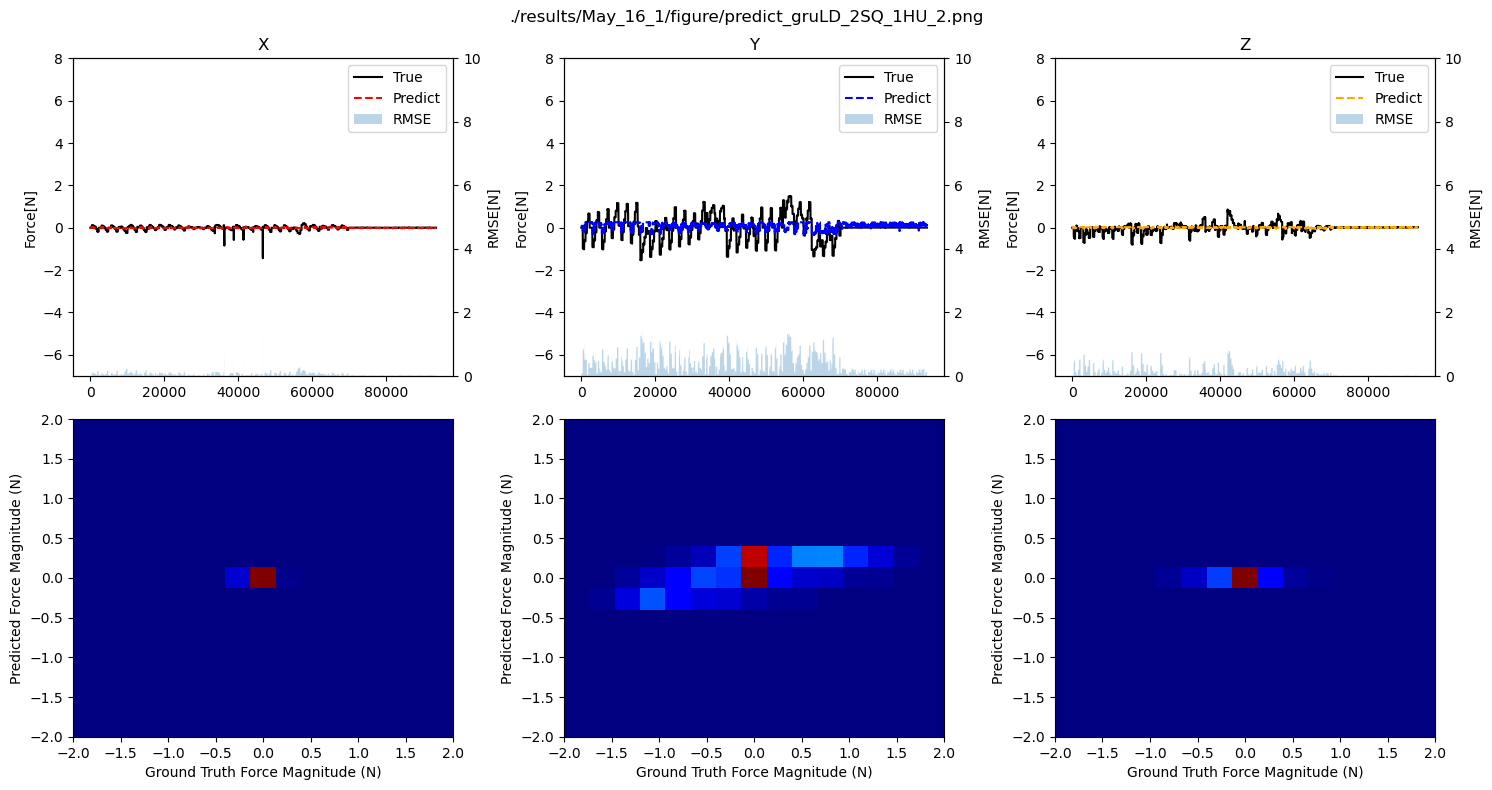

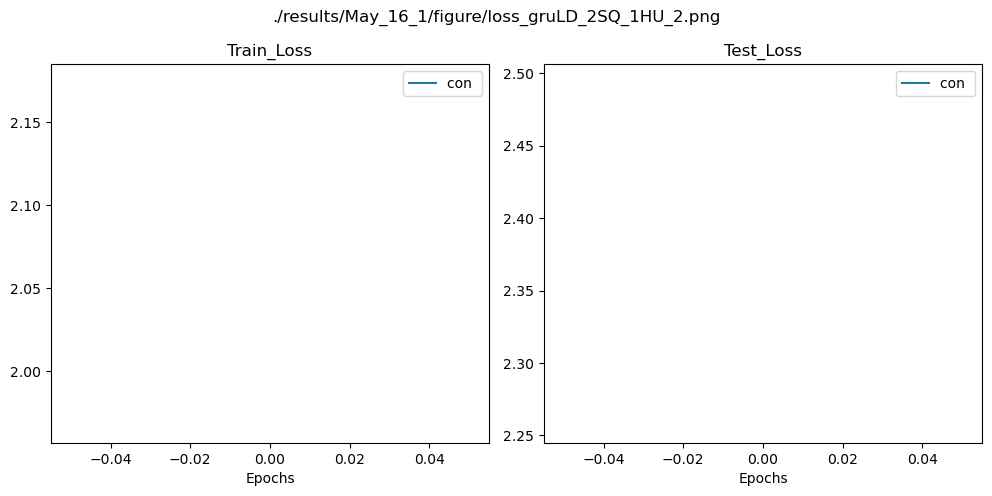

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.1762 | test_loss: 2.3865 | 
Time taken : 22.830514100000073
[INFO] Saving model to: results\May_16_1\models\gruLD_2SQ_2HU_1\model.pth


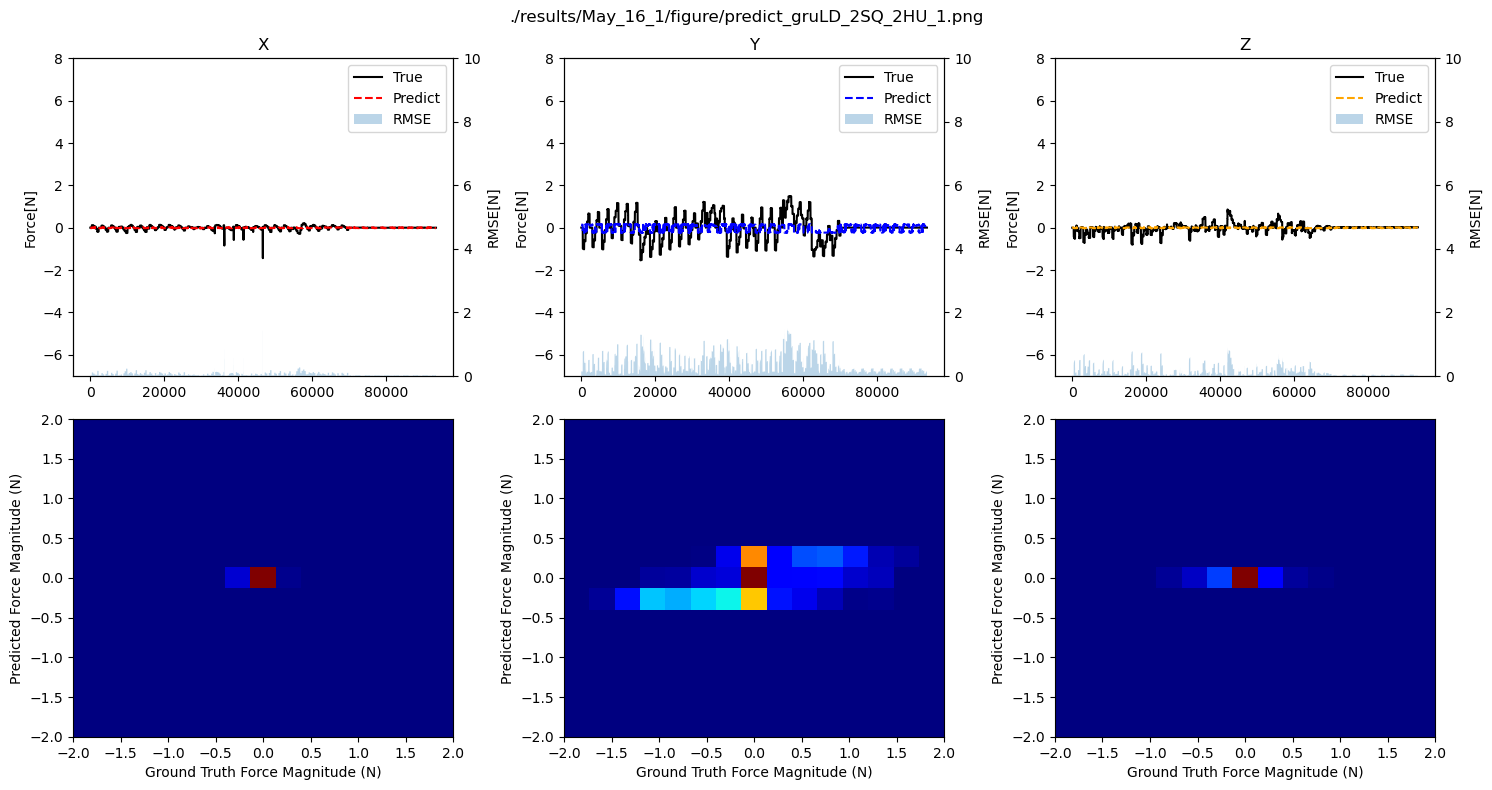

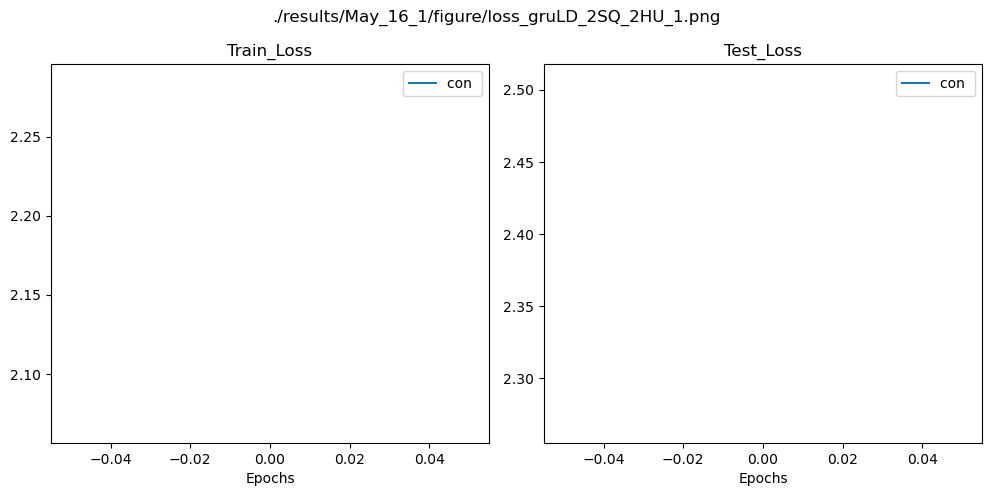

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.1007 | test_loss: 2.3426 | 
Time taken : 24.671592599999713
[INFO] Saving model to: results\May_16_1\models\gruLD_2SQ_2HU_2\model.pth


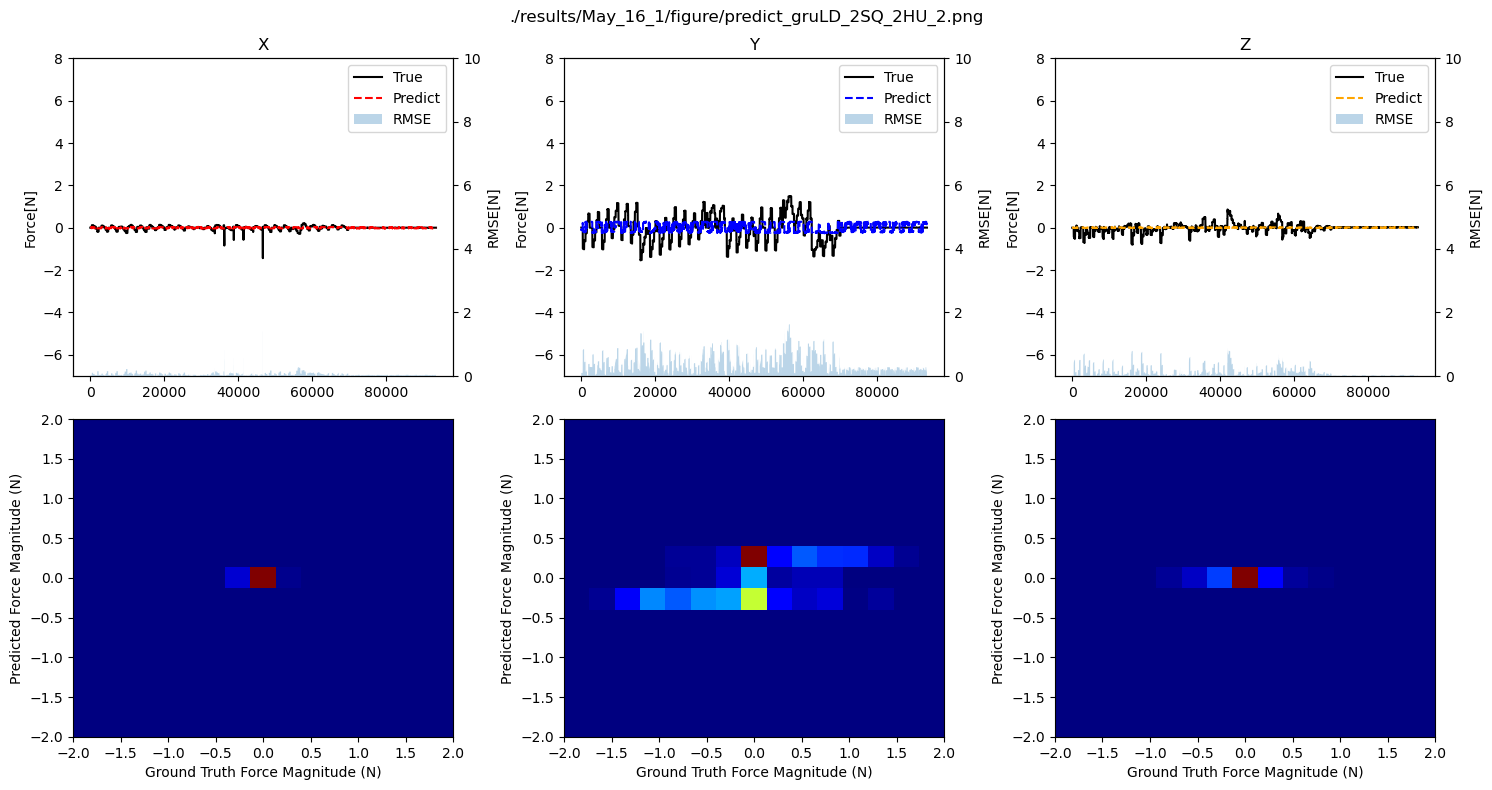

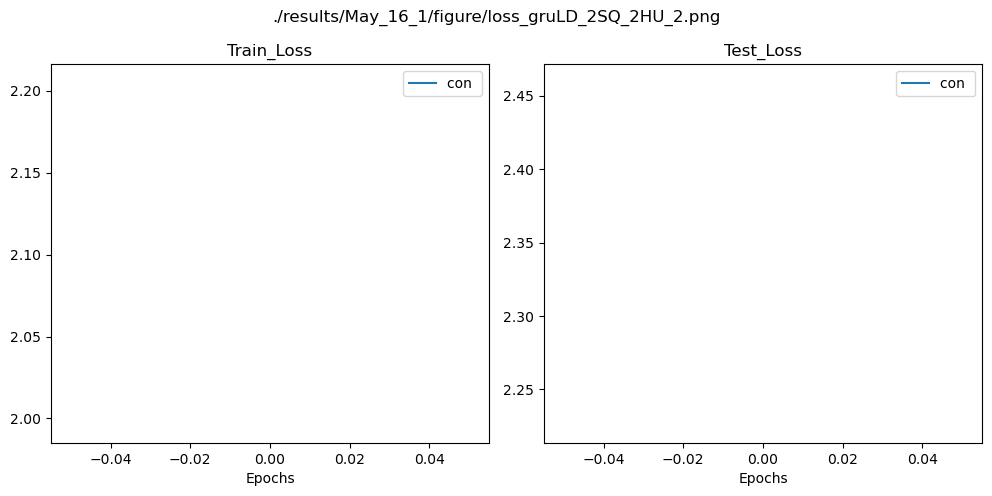

In [54]:
duration_time=[]
loss_results=[]
final_results=[]
result_rmse=[]

today_date=datetime.today().strftime('%B_%d') # folder name
counter = 1
dir_name=f"./results/{today_date}_{counter}"
while os.path.exists(dir_name):
    dir_name = dir_name=f"./results/{today_date}_{counter}"
    counter += 1
figure_dir=dir_name+'/figure'
model_dir=dir_name+'/models'
scaler_dir=dir_name+'/scaler'

os.makedirs(dir_name,exist_ok=True)
os.makedirs(figure_dir,exist_ok=True)
os.makedirs(model_dir,exist_ok=True)
os.makedirs(scaler_dir,exist_ok=True)

dscrpt=1

# Hyper parameters
LAYER_DIM1=[32,64,128] 
#LAYER_DIM1=[1,2] # 
Sequential_L1=[32,64,128] #
NUM_EPOCHS = 50
BATCH_SIZE = 128
HIDDEN_UNITS1 = [32,64,128]
#HIDDEN_UNITS1 = [1,2]
LEARNING_RATE = 0.001
Dropout_prob=0.2
model_name=['gru']
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



train_d= pd.DataFrame(total.query('properties<"4"  ').values,columns=Columns)
test_d= pd.DataFrame(total.query('properties=="4" ').values,columns=Columns)


    
for i in range(len(LAYER_DIM1)):
    for j in range(len(Sequential_L1)):
        for k in range(len(HIDDEN_UNITS1)):
            for l in range(len(model_name)):
                HIDDEN_UNITS=HIDDEN_UNITS1[k]
                LAYER_DIM=LAYER_DIM1[i]
                Sequential_L=Sequential_L1[j]
                name=model_name[l]+"LD_"+str(LAYER_DIM)+"SQ_"+str(Sequential_L)+"HU_"+str(HIDDEN_UNITS)
                prediction_figure_name=figure_dir+'/predict_'+name+'.png'
                loss_function_figure_name=figure_dir+'/loss_'+name+'.png'



                Y_tr=np.array(train_d.filter(items=For_col))
                X_tr=np.array(train_d.filter(items=total_feature)) ## important part

                #X_tr_scaler = sklearn.preprocessing.StandardScaler()
                #Y_tr_scaler = sklearn.preprocessing.StandardScaler()
                X_tr_scaler = sklearn.preprocessing.RobustScaler()
                Y_tr_scaler = sklearn.preprocessing.RobustScaler()
                #X_tr_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5, 0.5))
                #Y_tr_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-0.5, 0.5))
                #X_scaler = sklearn.preprocessing.MinMaxScaler()
                #Y_scaler = sklearn.preprocessing.MinMaxScaler()



                Y_te=np.array(test_d.filter(items=For_col))
                X_te=np.array(test_d.filter(items=total_feature)) ## important part



                X_test=torch.FloatTensor(X_tr_scaler.fit_transform(X_te))
                Y_test=torch.FloatTensor(Y_tr_scaler.fit_transform(Y_te))



                X_train=torch.FloatTensor(X_tr_scaler.fit_transform(X_tr))
                Y_train=torch.FloatTensor(Y_tr_scaler.fit_transform(Y_tr))






                train_dataset=DataLoader(utils.Data(X_train,Y_train,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)
                test_dataset=DataLoader(utils.Data(X_test,Y_test,Sequential_L),batch_size=BATCH_SIZE,shuffle=False)


                Input_dim=len(X_train[0])
                Output_dim=len(Y_train[0])
                if dscrpt == '1d':
                    if model_name[l]=='mpl':
                        if Sequential_L!=1:
                            continue
                        model = SimpleNN(input_size=Input_dim,
                                    hidden_size=HIDDEN_UNITS,
                                    layer_dim = LAYER_DIM,
                                    output_size=Output_dim,
                                    dropout_prob=0.2  
                                    )
                        '''
                        model = MLP(input_dim=Input_dim,
                                    layer_dim=LAYER_DIM, 
                                    hidden_dim=HIDDEN_UNITS,
                                    output_dim=Output_dim, 
                                    dropout_prob=0.2,
                                    activation_function=nn.ReLU())'''
                    elif model_name[l]=='lstm':
                        model = B_LSTMModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device,
                                            batch_type=batch[m])
                    elif model_name[l]=='gru':
                        model = B_GRUModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device,
                                            batch_type=batch[m])
                    elif model_name[l]=='rnn':
                        model = B_RNNModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device,
                                            batch_type=batch[m])
                else: 
                    if model_name[l]=='mpl':
                        if Sequential_L!=1:
                            continue
                        model = SimpleNN(input_size=Input_dim,
                                    hidden_size=HIDDEN_UNITS,
                                    layer_dim = LAYER_DIM,
                                    output_size=Output_dim,
                                    dropout_prob=0.2  
                                    )

                        #model = MLP(input_dim=Input_dim,
                         #           layer_dim=LAYER_DIM, 
                          #          hidden_dim=HIDDEN_UNITS,
                           #         output_dim=Output_dim, 
                            #        dropout_prob=0.2,
                             #       activation_function=nn.ReLU())
                    elif model_name[l]=='lstm':
                        model = LSTMModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device)
                    elif model_name[l]=='gru':
                        model = GRUModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device)
                    elif model_name[l]=='rnn':
                        model = RNNModel_V2(    input_dim = Input_dim,
                                            hidden_dim=HIDDEN_UNITS,
                                            layer_dim=LAYER_DIM,
                                            output_dim=Output_dim,
                                            dropout_prob=0.2,device=device)


                model.to(device)


                # Set loss and optimizer
                loss_fn = torch.nn.MSELoss() ## change
                optimizer = torch.optim.Adam(model.parameters(), ## change
                                             lr=LEARNING_RATE)
                # Train
                #torchinfo.summary(model,(5,5,5))
                start_time = timer()
                results=engine.train(model=model,
                             train_dataloader=train_dataset,
                             test_dataloader=test_dataset,
                             loss_fn=loss_fn,
                             optimizer=optimizer,
                             epochs=NUM_EPOCHS,
                             device=device)
                end_time = timer()

                print(f'Time taken : {end_time-start_time}')
                loss_results.append(results)
                Pred_Values=Y_tr_scaler.inverse_transform(utils.predict(model,test_dataset,device).to('cpu'))
                True_Values=Y_tr_scaler.inverse_transform(Y_test)
                result_rmse.append( rmse(Pred_Values,True_Values))
                utils.save_model(model=model,
                                 target_dir=model_dir+'/'+name,
                                 model_name="model.pth")
                plot_prediction(Pred_Values,True_Values,2,save_flag=True,save_name=prediction_figure_name )
                plot_loss_curves(results,single_flag=True,save_flag=True, save_name=loss_function_figure_name)
                model_scaler=scaler_dir+'/'+name
                os.makedirs(model_scaler)
                joblib.dump(X_tr_scaler, model_scaler+"/X_scaler.save") 
                joblib.dump(Y_tr_scaler, model_scaler+"/Y_scaler.save") 
